In [1]:
import doublespike as ds

In [2]:
idat = ds.IsoData('Fe')

In [3]:
print(idat)

element: Fe
isonum: [54 56 57 58]
mass: [53.9396148 55.9349421 56.9353987 57.9332805]
standard: [0.05845 0.91754 0.02119 0.00282]
spike: None


In [4]:
idat.set_spike([0.0, 0.0, 0.5, 0.5])

In [5]:
measured = [0.2658, 4.4861, 2.6302, 2.6180]

In [6]:
ds.dsinversion(idat, measured)

{'alpha': -0.190741366877082,
 'beta': 1.8043635576745123,
 'prop': 0.4999563048719154,
 'sample': array([0.05806459, 0.91782714, 0.02126843, 0.00283983]),
 'mixture': array([0.02903483, 0.45895368, 0.2606133 , 0.25139819])}

In [7]:
help(ds.dsinversion)

Help on function dsinversion in module doublespike.inversion:

dsinversion(isodata, measured, spike=None, isoinv=None, standard=None)
    Do the double spike inversion for a given set of measurements
            isodata -- object of class IsoData, e.g. IsoData('Fe')
            measured -- a matrix of beam intensities. Columns correspond to the
                different isotopes e.g. for Fe, first column is 54Fe, second is 56Fe,
                third is 57Fe, fourth is 58Fe. The matrix should have the same number
                of columns as there are isotopes available.
            spike -- a composition vector for the spike. e.g. [0, 0, 0.5, 0.5] is a 50-50
                mix of 57Fe and 58Fe. If None this is read from isodata.
            isoinv -- the four isotopes to use in the inversion, e.g [54, 56, 57, 58]. If
                None this is read from isodata.
            standard -- standard composition or unspiked run data. If
                None this is read from isodata.
  

In [8]:
help(ds.IsoData)

Help on class IsoData in module doublespike.data:

class IsoData(builtins.object)
 |  Object which stores data on an isotope system.
 |  
 |  Args:
 |      element (str): the element string (e.g. 'Fe')
 |  
 |  Attributes:
 |      element (str): the element e.g. 'Fe'
 |      isonum (array): the isotopes of this element e.g. [54, 56, 57, 58]
 |      mass (array): the atomic masses
 |      standard (array): composition of a standard as a vector
 |      spike (array): composition of a double spike used
 |      isoinv (array): the 4 isotopes to use the inversion
 |      rawspike (array): composition of single spikes available
 |      errormodel (dict): dictionary describing the errormodel
 |  
 |  Methods defined here:
 |  
 |  __init__(self, element)
 |      Given an element, initialise with some sensible default values.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  isoindex(self, ix)
 |      Give the data index corresponding 

In [9]:
idat.set_errormodel()

In [10]:
idat.errormodel

{'measured': {'type': 'fixed-total',
  'intensity': 10.0,
  'a': array([2.0709756e-10, 2.0709756e-10, 2.0709756e-10, 2.0709756e-10]),
  'b': array([2.00272058e-09, 2.00272058e-09, 2.00272058e-09, 2.00272058e-09]),
  'c': array([0., 0., 0., 0.])},
 'spike': {'type': 'fixed-total',
  'intensity': 10.0,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])},
 'standard': {'type': 'fixed-total',
  'intensity': 10.0,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])}}

In [11]:
idat=ds.IsoData('Fe')
idat.set_errormodel()
idat.errormodel

{'measured': {'type': 'fixed-total',
  'intensity': 10.0,
  'a': array([2.0709756e-10, 2.0709756e-10, 2.0709756e-10, 2.0709756e-10]),
  'b': array([2.00272058e-09, 2.00272058e-09, 2.00272058e-09, 2.00272058e-09]),
  'c': array([0., 0., 0., 0.])},
 'spike': {'type': 'fixed-total',
  'intensity': 10.0,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])},
 'standard': {'type': 'fixed-total',
  'intensity': 10.0,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])}}

[[0.26568715 4.48608044 2.6301861  2.61805346]
 [0.26569946 4.48600042 2.63029706 2.61792861]
 [0.26575872 4.48597032 2.6303865  2.61787729]
 [0.26578747 4.48599453 2.63026923 2.61798592]
 [0.26574623 4.4858777  2.63037348 2.61804327]
 [0.26574411 4.48611183 2.63040412 2.61804674]
 [0.2657571  4.48589775 2.63033317 2.61801775]
 [0.26572326 4.48591507 2.63028124 2.6180031 ]
 [0.26575863 4.4861318  2.63032828 2.61796126]
 [0.26572141 4.48594203 2.63036798 2.61794394]]


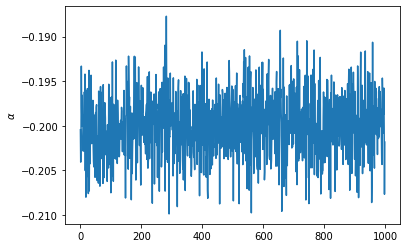

In [12]:
idat = ds.IsoData('Fe')
idat.set_spike([0.0, 0.0, 0.5, 0.5])
idat.set_errormodel()
measuredv = ds.monterun(idat, prop = 0.5, alpha = -0.2, beta = 1.8, n = 1000)
print(measuredv[0:10,:])
    
out = ds.dsinversion(idat, measuredv)
import matplotlib.pyplot as plt
plt.plot(out['alpha'])
plt.ylabel(r'$\alpha$')
plt.show()

In [13]:
isodata = ds.IsoData('Fe')
isodata.set_errormodel()
measured = ds.monterun(isodata,0.5,[0, 0, 0.5, 0.5], n=10)
measured

array([[0.2922578 , 4.58778095, 2.60597972, 2.51410077],
       [0.29222731, 4.58770118, 2.60587908, 2.51421033],
       [0.29228662, 4.58797641, 2.60598115, 2.51418152],
       [0.29224955, 4.58778627, 2.60601497, 2.51413247],
       [0.29227958, 4.5877002 , 2.60601772, 2.51412957],
       [0.29227371, 4.58763789, 2.60596133, 2.51405936],
       [0.29227968, 4.58761879, 2.60591961, 2.51414532],
       [0.29225188, 4.58785188, 2.60602043, 2.51405666],
       [0.29225186, 4.5876699 , 2.60594125, 2.51394289],
       [0.29225827, 4.58766303, 2.60593052, 2.51399267]])

In [14]:
ds.dsinversion(isodata,measured,[0, 0, 0.5, 0.5],[54, 56, 57, 58])

{'alpha': array([-0.0003883 ,  0.00209722,  0.00302121, -0.00125081,  0.0018179 ,
         0.00129839,  0.00488389, -0.00326021, -0.00308483, -0.00107021]),
 'beta': array([-0.00063724,  0.00424153,  0.00123002, -0.00069054, -0.00096698,
        -0.00130816,  0.00160098, -0.00252597, -0.00344093, -0.00207135]),
 'prop': array([0.50000141, 0.49997277, 0.49998105, 0.50000507, 0.50001082,
        0.50001041, 0.49999308, 0.50001082, 0.50001742, 0.50000996]),
 'sample': array([[0.05844921, 0.91754059, 0.02119016, 0.00282004],
        [0.05845425, 0.91753683, 0.02118914, 0.00281978],
        [0.05845612, 0.91753543, 0.02118876, 0.00281969],
        [0.05844746, 0.91754189, 0.02119051, 0.00282013],
        [0.05845368, 0.91753725, 0.02118925, 0.00281981],
        [0.05845263, 0.91753804, 0.02118947, 0.00281987],
        [0.0584599 , 0.91753261, 0.02118799, 0.00281949],
        [0.05844339, 0.91754493, 0.02119134, 0.00282034],
        [0.05844375, 0.91754467, 0.02119127, 0.00282032],
        [

In [15]:
help(ds)

Help on package doublespike:

NAME
    doublespike

DESCRIPTION
    The double spike toolbox
    
    Error propagation and data reduction for the double spike technique in mass spectrometry.
    
    The workings of this package are described in:
    
    Rudge J.F., Reynolds B.C., Bourdon B. The double spike toolbox (2009) Chem. Geol. 265:420-431
    https://dx.doi.org/10.1016/j.chemgeo.2009.05.010
    
    and at:
    
    https://johnrudge.com/doublespike

PACKAGE CONTENTS
    cocktail
    data
    errors
    inversion
    monte
    plotting

VERSION
    0.1.0

AUTHOR
    John F. Rudge

FILE
    /home/rudge/research/pyspike/doublespike/__init__.py




In [16]:
fe = ds.IsoData('Fe')

In [17]:
fe.isonum

array([54, 56, 57, 58])

In [18]:
isodata_fe = IsoData('Fe')
error, ppmperamu = errorestimate(isodata_fe,0.5,[0,0.5,0,0.5])

NameError: name 'IsoData' is not defined